In [ ]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections

**Part1**

In this part of the assignment, you need to code the DTW algorithm from scratch. 

1. Given two templates, Write a dynamic time warping algorithm to obtain the optimal distance between them.

> Compute the distance matrix between the two templates 


> Compute the accumulative distance matrix


> Backtrack from the accumulative distance matrix to get the optimal path and thereby compute the optimal distance   


> Plot the optimal path on both the distance matrix and cumulative distance matrix to verify the DTW codes



In [ ]:
###########################################################
#Function to obtain the optimal distance and path between two templates
###########################################################
def DTW(template1,template2): 
    #######################################################
    # Input  : Two templates 
    # Output : DTW path and optimal distance 
    #######################################################
    # template1 = [4,3,7,0,2,6,5]
    # template2 = [3,7,1,6,1,5,4,4]

    m = len(template1)
    n = len(template2)

    # # Matrix of size mxn
    # a = np.array(template1*n).reshape((n,m)).T
    # b = np.array(template2*m).reshape((m,n))
    # DTW_distance = (a-b)**2
    # print(f"Distance Matrix: \n{DTW_distance}")


    #######################################################
    # Code snippet to create the cumulative distance matrix
    #######################################################
    # Initialize the cumulative distance matrix
    


    DTW_cumulate_Matrix = np.zeros((m,n))   # cummulative distance matrix
    #Iterate through the sequence of features in templates and compute the distance between the templates.
    for i in range(len(template1)): #you can start from 1 
        for j in range(len(template2)):
            current_distance =  (np.linalg.norm(template1[i] - template2[j]))**2    # Compute the euclidean distance between the current feature vectors

            #Add min(DTW_cumulate_Matrix[i-1,j],DTW_cumulate_Matrix[i-1,j-1],DTW_cumulate_Matrix[i,j-1]) to "current_distance" and assign it to "DTW_cumulate_Matrix[i,j]"
            if(i==0 and j==0):
              DTW_cumulate_Matrix[i,j] = current_distance
            elif(i==0):
              DTW_cumulate_Matrix[i,j] = current_distance + DTW_cumulate_Matrix[i,j-1]
            elif(j==0):
              DTW_cumulate_Matrix[i,j] = current_distance + DTW_cumulate_Matrix[i-1,j]
            else:
              DTW_cumulate_Matrix[i,j] = current_distance + min(DTW_cumulate_Matrix[i-1,j], DTW_cumulate_Matrix[i,j-1], DTW_cumulate_Matrix[i-1,j-1])


    # DTW_cumulate_Matrix = (np.flip(DTW_cumulate_Matrix.T,0))




    #######################################################
    # Code snippet to find the optimal DTW path and the corresponding optimal distance
    #######################################################
    opt_distance = 0.0
    i = m # length of the template1
    j = n # length of the template2
    
    # 0-indexed matrix
    i-=1
    j-=1
    opt_path = [[i,j]]

    while i!=0 or j!=0: #Start from the last point and backtrack
        #Get the indexes (i,j) of the small value among (DTW_cumulate_Matrix[i-1,j], DTW_cumulate_Matrix[i-1,j-1], DTW_cumulate_Matrix[i,j-1])
        #You may use "np.argmin for Eucludian (or np.argmax for cosine) " function for doing it
        if(i==0):
          prev_idx = [i,j-1]
        elif(j==0):
          prev_idx = [i-1,j]
        else:
          prev_idx = np.argmin([DTW_cumulate_Matrix[i-1,j],DTW_cumulate_Matrix[i,j-1],DTW_cumulate_Matrix[i-1,j-1]])
          if(prev_idx == 0):
            prev_idx = [i-1,j]
          elif(prev_idx == 1):
            prev_idx = [i,j-1]
          else:
            prev_idx = [i-1,j-1]

        # print(f"current idx : {i} {j}")
        i = prev_idx[0]
        j = prev_idx[1]
        # print(f"next idx : {i} {j}")
        # Add the current indexes distance 
        opt_distance = opt_distance + (np.linalg.norm(template1[prev_idx[0]] - template2[prev_idx[1]]))**2  # Compute the euclidean distance  of feature vectors  Template1[i] and Template2[j]

                

        #Store the required indexes to obtain the optimal path 
        opt_path.append(prev_idx)

    # Adding the euclidean distance of start and end points, as they were not included in above while loop
    opt_distance += (np.linalg.norm(template1[m-1] - template2[n-1])**2)
    # opt_distance += (np.linalg.norm(template1[0] - template2[0]))**2
    # opt_path.append([0,0])

    # print(f"opttimal distance : {opt_distance}")
    # print(f"optimal path : {opt_path}")



    #######################################################
    # Return optimal distance and optimal dtw path
    #######################################################
    return opt_distance, opt_path




def plotDTWpath(template1,template2):
    #######################################################
    # Inputs : template1 and template2
    # Outputs : plot of optimal path on distance matrix and cumulative distance matrix 
    #######################################################
    m = len(template1)
    n = len(template2)

    #Compute distance and cumulative distance between the given templates 
    DTW_distance = np.zeros((m,n))
    DTW_cumulate_Matrix = np.zeros((m,n))
    for i in range(m):
      for j in range(n):
        current_distance =  (np.linalg.norm(template1[i] - template2[j]))**2   # Compute the euclidean distance between the current feature vectors
        DTW_distance[i,j] = current_distance
        #Add min(DTW_cumulate_Matrix[i-1,j],DTW_cumulate_Matrix[i-1,j-1],DTW_cumulate_Matrix[i,j-1]) to "current_distance" and assign it to "DTW_cumulate_Matrix[i,j]"
        if(i==0 and j==0):
          DTW_cumulate_Matrix[i,j] = current_distance
        elif(i==0):
          DTW_cumulate_Matrix[i,j] = current_distance + DTW_cumulate_Matrix[i,j-1]
        elif(j==0):
          DTW_cumulate_Matrix[i,j] = current_distance + DTW_cumulate_Matrix[i-1,j]
        else:
          DTW_cumulate_Matrix[i,j] = current_distance + min(DTW_cumulate_Matrix[i-1,j], DTW_cumulate_Matrix[i,j-1], DTW_cumulate_Matrix[i-1,j-1])


    #Obtain the optimal path using "DTW" function
    opt_dist, opt_path = DTW(template1,template2)


    #Plot the optimal path on distance and cumulative matrices and verify the DTW codes
    x_val = np.array(opt_path)[:,0][::-1]
    y_val = np.array(opt_path)[:,1][::-1]

    fig, px = plt.subplots(1,2, figsize=(30, 20))
    px[0].matshow(DTW_cumulate_Matrix, cmap=plt.cm.YlOrRd, alpha=0.5)
    for i1 in range(DTW_cumulate_Matrix.shape[0]):
        for j1 in range(DTW_cumulate_Matrix.shape[1]):
            px[0].text(x=j1,y=i1,s=DTW_cumulate_Matrix[i1, j1], va='center', ha='center', size='xx-large')
    px[0].set_title("CUMULATIVE MATRIX", fontsize = 20)
    px[0].plot(y_val,x_val, linewidth = 3, color = 'red')

    px[1].matshow(DTW_distance, cmap=plt.cm.YlOrRd, alpha=0.5)
    for i1 in range(DTW_distance.shape[0]):
        for j1 in range(DTW_distance.shape[1]):
            px[1].text(x=j1,y=i1,s=DTW_distance[i1, j1], va='center', ha='center', size='xx-large')

    px[1].set_title("DISTANCE MATRIX", fontsize = 20)
    px[1].plot(y_val,x_val, linewidth = 3, color = 'red')

                

20.0


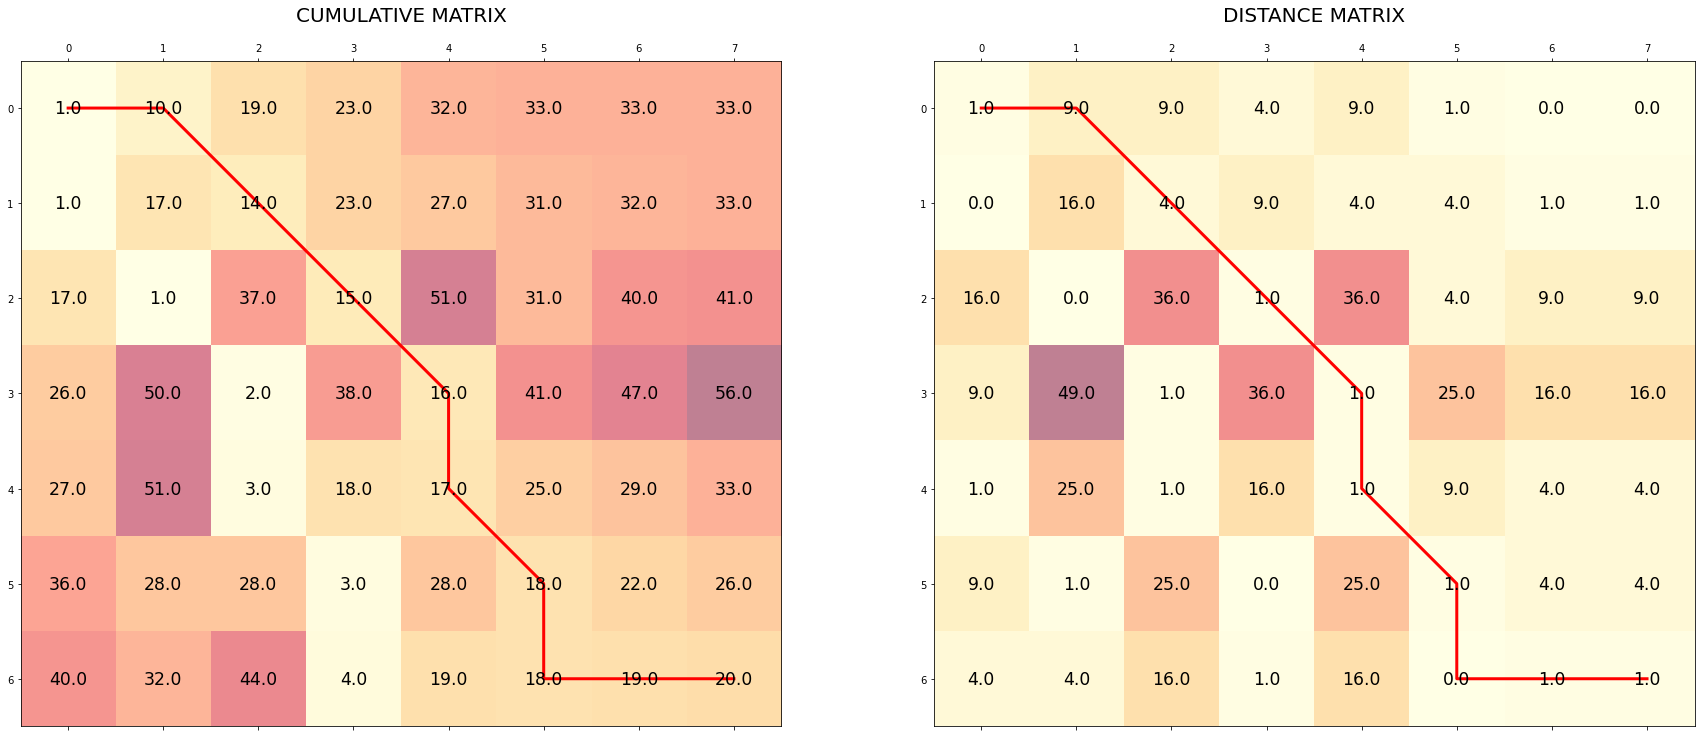

In [ ]:
template1 = [4,3,7,0,2,6,5]
template2 = [3,7,1,6,1,5,4,4]

o_d, o_p = DTW(template1,template2)
plotDTWpath(template1,template2)
print(o_d)


9.0


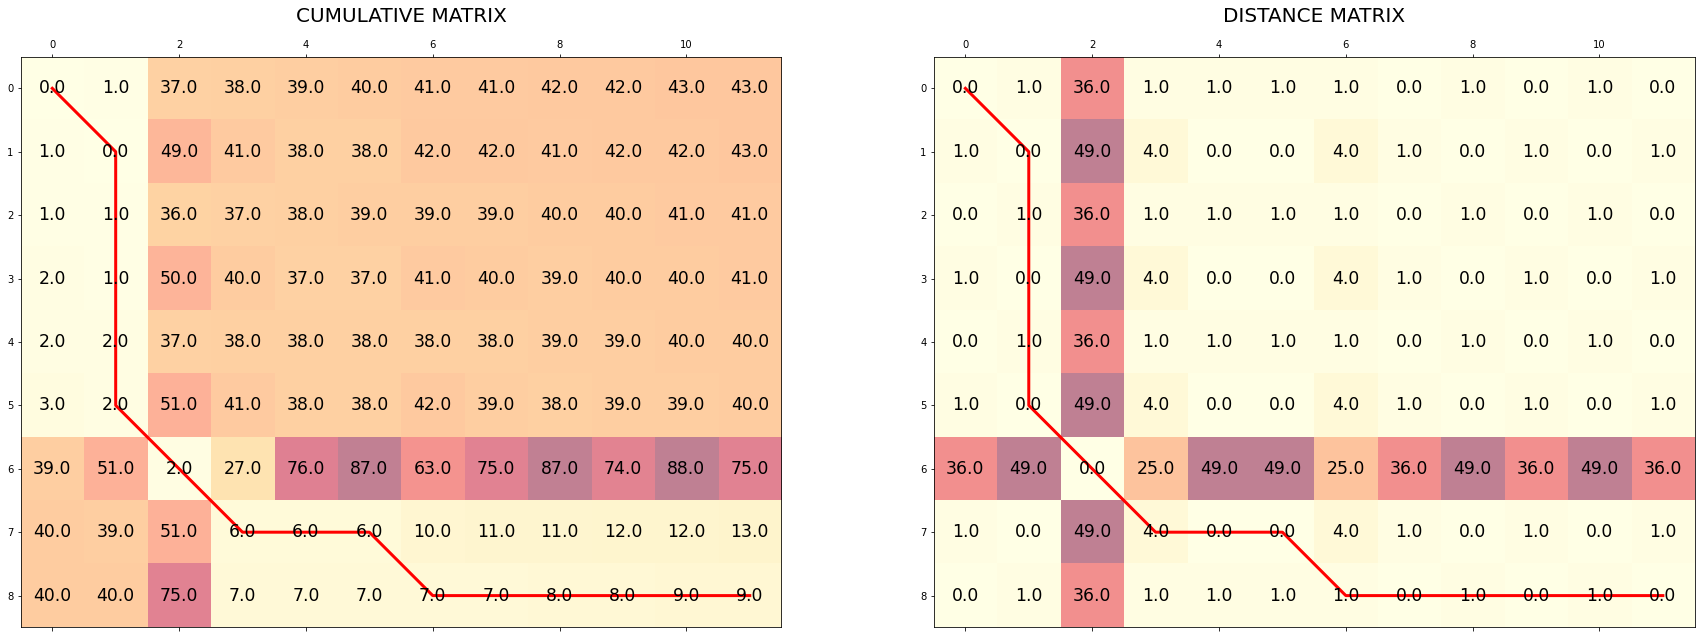

In [ ]:
template1 = [1,0,1,0,1,0,7,0,1]
template2 = [1,0,7,2,0,0,2,1,0,1,0,1]

o_d, o_p = DTW(template1,template2)
plotDTWpath(template1,template2)
o_path1 = (np.array(o_p).reshape((len(o_p),2)))
print(o_d)




**Part2**

In this part of the assignment, we expect you to build the isolated digit recognition system with the help of the above written DTW algorithm 

1. Record one repetition each of digits zero,one,two,three,four,five,six,seven,eight and nine. The modules to record the voice in online mode are provided here. If you are not comfortable using the online recording modules, you can record the digits offline and access them in google colab through proper codes.
2. Record three further repetitions of the same digits (isolated words) as test data.  
3. The codes to compute the signal's templates ( Mel Frequency Cepstral Coefficients ) are provided. Please use them to obtain the templates of the speech signals.   
4. Write an algorithm to perform isolated word recognition with the help of the DTW codes
5. Take two pairs such that one pair is the repetition of the same digit and another one is two different digits. Plot the optimal DTW path on distance and cumulative distance matrices for both cases.   
6. Evaluate the digit recognition accuracy, i.e., the percentage of correctly recognized trials out of each digit's total number of attempts. 
7. Create a confusion matrix and report the most confusing digits. 


**Module to record the voice in online mode**

In [ ]:
from IPython.display import Javascript
from google.colab import output
from base64 import b64decode
from io import BytesIO
!pip -q install pydub
from pydub import AudioSegment

RECORD = """
const sleep  = time => new Promise(resolve => setTimeout(resolve, time))
const b2text = blob => new Promise(resolve => {
  const reader = new FileReader()
  reader.onloadend = e => resolve(e.srcElement.result)
  reader.readAsDataURL(blob)
})
var record = time => new Promise(async resolve => {
  stream = await navigator.mediaDevices.getUserMedia({ audio: true })
  recorder = new MediaRecorder(stream)
  chunks = []
  recorder.ondataavailable = e => chunks.push(e.data)
  recorder.start()
  await sleep(time)
  recorder.onstop = async ()=>{
    blob = new Blob(chunks)
    text = await b2text(blob)
    resolve(text)
  }
  recorder.stop()
})
"""

def record(sec=3):
  display(Javascript(RECORD))
  s = output.eval_js('record(%d)' % (sec*1000))
  b = b64decode(s.split(',')[1])
  audio = AudioSegment.from_file(BytesIO(b))
  return audio

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import scipy.io.wavfile
import io
import os

#### Please comment below line, if you already uploaded the 'recording.wav' in '/content/'
!rm recording.wav

#### You can run this module in the loop to record more repetitions of the digits.
if os.path.isfile('recording.wav'):
    print("wavefile exists, later part of the code uses 'recording.wav' as input speech")
else:
    print("Recording the digits")
    wav = record(3.0) #It will record three seconds of your speech. You can change the duration. 
    wav = wav.set_frame_rate(16000)
    sig=wav.get_array_of_samples()
    samples=np.array(sig).T.astype(np.float32)
    fp_arr = np.array(samples).T.astype(np.float32)
    fp_arr /= np.iinfo(sig.typecode).max
    scipy.io.wavfile.write('recording.wav', 16000, fp_arr) #Please change the name.


# import scipy.io.wavfile as wav
# from python_speech_features import mfcc
# import speechpy

# sigg = MFCC('recording.wav')
# print("predicting")
# arr11, pred11 = digit_Classify(templates,sigg)
# print("pred11 : ", pred11)
# print(arr11)

rm: cannot remove 'recording.wav': No such file or directory
Recording the digits


<IPython.core.display.Javascript object>

**Code to compute the signal's templates i.e Mel Frequency Cepstral Coefficients**

In [ ]:
!pip install speechpy
!pip install python_speech_features

  Created wheel for python-speech-features: filename=python_speech_features-0.6-py3-none-any.whl size=5888 sha256=9533e556bd0f993ab3be2362875ed68d60ad755d96287c473074e3766fe73654
  Stored in directory: /root/.cache/pip/wheels/b0/0e/94/28cd6afa3cd5998a63eef99fe31777acd7d758f59cf24839eb
Successfully built python-speech-features


In [ ]:
import scipy.io.wavfile as wav
from python_speech_features import mfcc
import speechpy
def MFCC(wavfile):
  ###########################
  # Input  : Signal of length t
  # Output : Templates of size (T,30) where T is the number of frames and 30 is dimension of the feature for each frame
  ###########################
  (rate,sig) = wav.read(wavfile)
  sig=sig-np.mean(sig)
  mfcc_feat=mfcc(sig,rate,numcep=30,winlen=0.025,winstep=0.01,nfilt=30,lowfreq=20,highfreq=7600,winfunc=np.hamming)
  mfcc_feat_cmvn=speechpy.processing.cmvnw(mfcc_feat,win_size=301,variance_normalization=False)
  return mfcc_feat_cmvn

**Loading the recorded data from drive**

In [ ]:
##########################################################
#### Loading the recorded data from drive
##########################################################


## Example code to load wavefiles from drive
from google.colab import drive
import os
import soundfile as sf

drive.mount('/content/drive')
data_location='/content/drive/My Drive/PRMLAssignments/ProgrammingAssignment-05/digit_records/' #Change this location
data_files=[]
for root, dirs, files in os.walk(data_location):
    for file in files:
        if file.endswith(".wav"):
            data_files.append(os.path.join(root, file))
data_files = np.array(data_files)



## templates will hold MFCC of all the recorded data
templates = []
for i,data in enumerate(data_files):
  sig = MFCC(data)
  templates.append(sig)
templates = np.array(templates)
print(f"Template dimensions : {templates.shape}")




Mounted at /content/drive
Template dimensions : (40, 293, 30)


**Algorithm to perform isolated digit recognition**

In [ ]:
def digit_Classify(templates,rec):
  vec = np.zeros(10)
  for i in range(10):
    ## Here we are not using the test data for comparing (only first recorded data)
    vec[i], path  = DTW(templates[i*4],rec)
  return vec, np.argmin(vec)

**Plot the optimal DTW path**

In [ ]:
def DTW_MAT(template1,template2):
    m = len(template1)
    n = len(template2)
    DTW_cumulate_Matrix = np.zeros((m,n))   # cummulative distance matrix
    DTW_distance = np.zeros((m,n))   # cummulative distance matrix
    #Iterate through the sequence of features in templates and compute the distance between the templates.
    for i in range(len(template1)): #you can start from 1 
        for j in range(len(template2)):
            current_distance =  (np.linalg.norm(template1[i] - template2[j]))**2    # Compute the euclidean distance between the current feature vectors
            DTW_distance[i,j] = current_distance
            #Add min(DTW_cumulate_Matrix[i-1,j],DTW_cumulate_Matrix[i-1,j-1],DTW_cumulate_Matrix[i,j-1]) to "current_distance" and assign it to "DTW_cumulate_Matrix[i,j]"
            if(i==0 and j==0):
              DTW_cumulate_Matrix[i,j] = current_distance
            elif(i==0):
              DTW_cumulate_Matrix[i,j] = current_distance + DTW_cumulate_Matrix[i,j-1]
            elif(j==0):
              DTW_cumulate_Matrix[i,j] = current_distance + DTW_cumulate_Matrix[i-1,j]
            else:
              DTW_cumulate_Matrix[i,j] = current_distance + min(DTW_cumulate_Matrix[i-1,j], DTW_cumulate_Matrix[i,j-1], DTW_cumulate_Matrix[i-1,j-1])
    
    # DTW_cumulate_Matrix = np.flip(DTW_cumulate_Matrix.T,0)
    # DTW_distance = np.flip(DTW_distance.T,0)
    return DTW_cumulate_Matrix, DTW_distance

Optimal Distance for 1st pair of digits (same) : 480119.5803752526
Optimal Distance for 2nd pair of digits (different) : 625218.2273782601


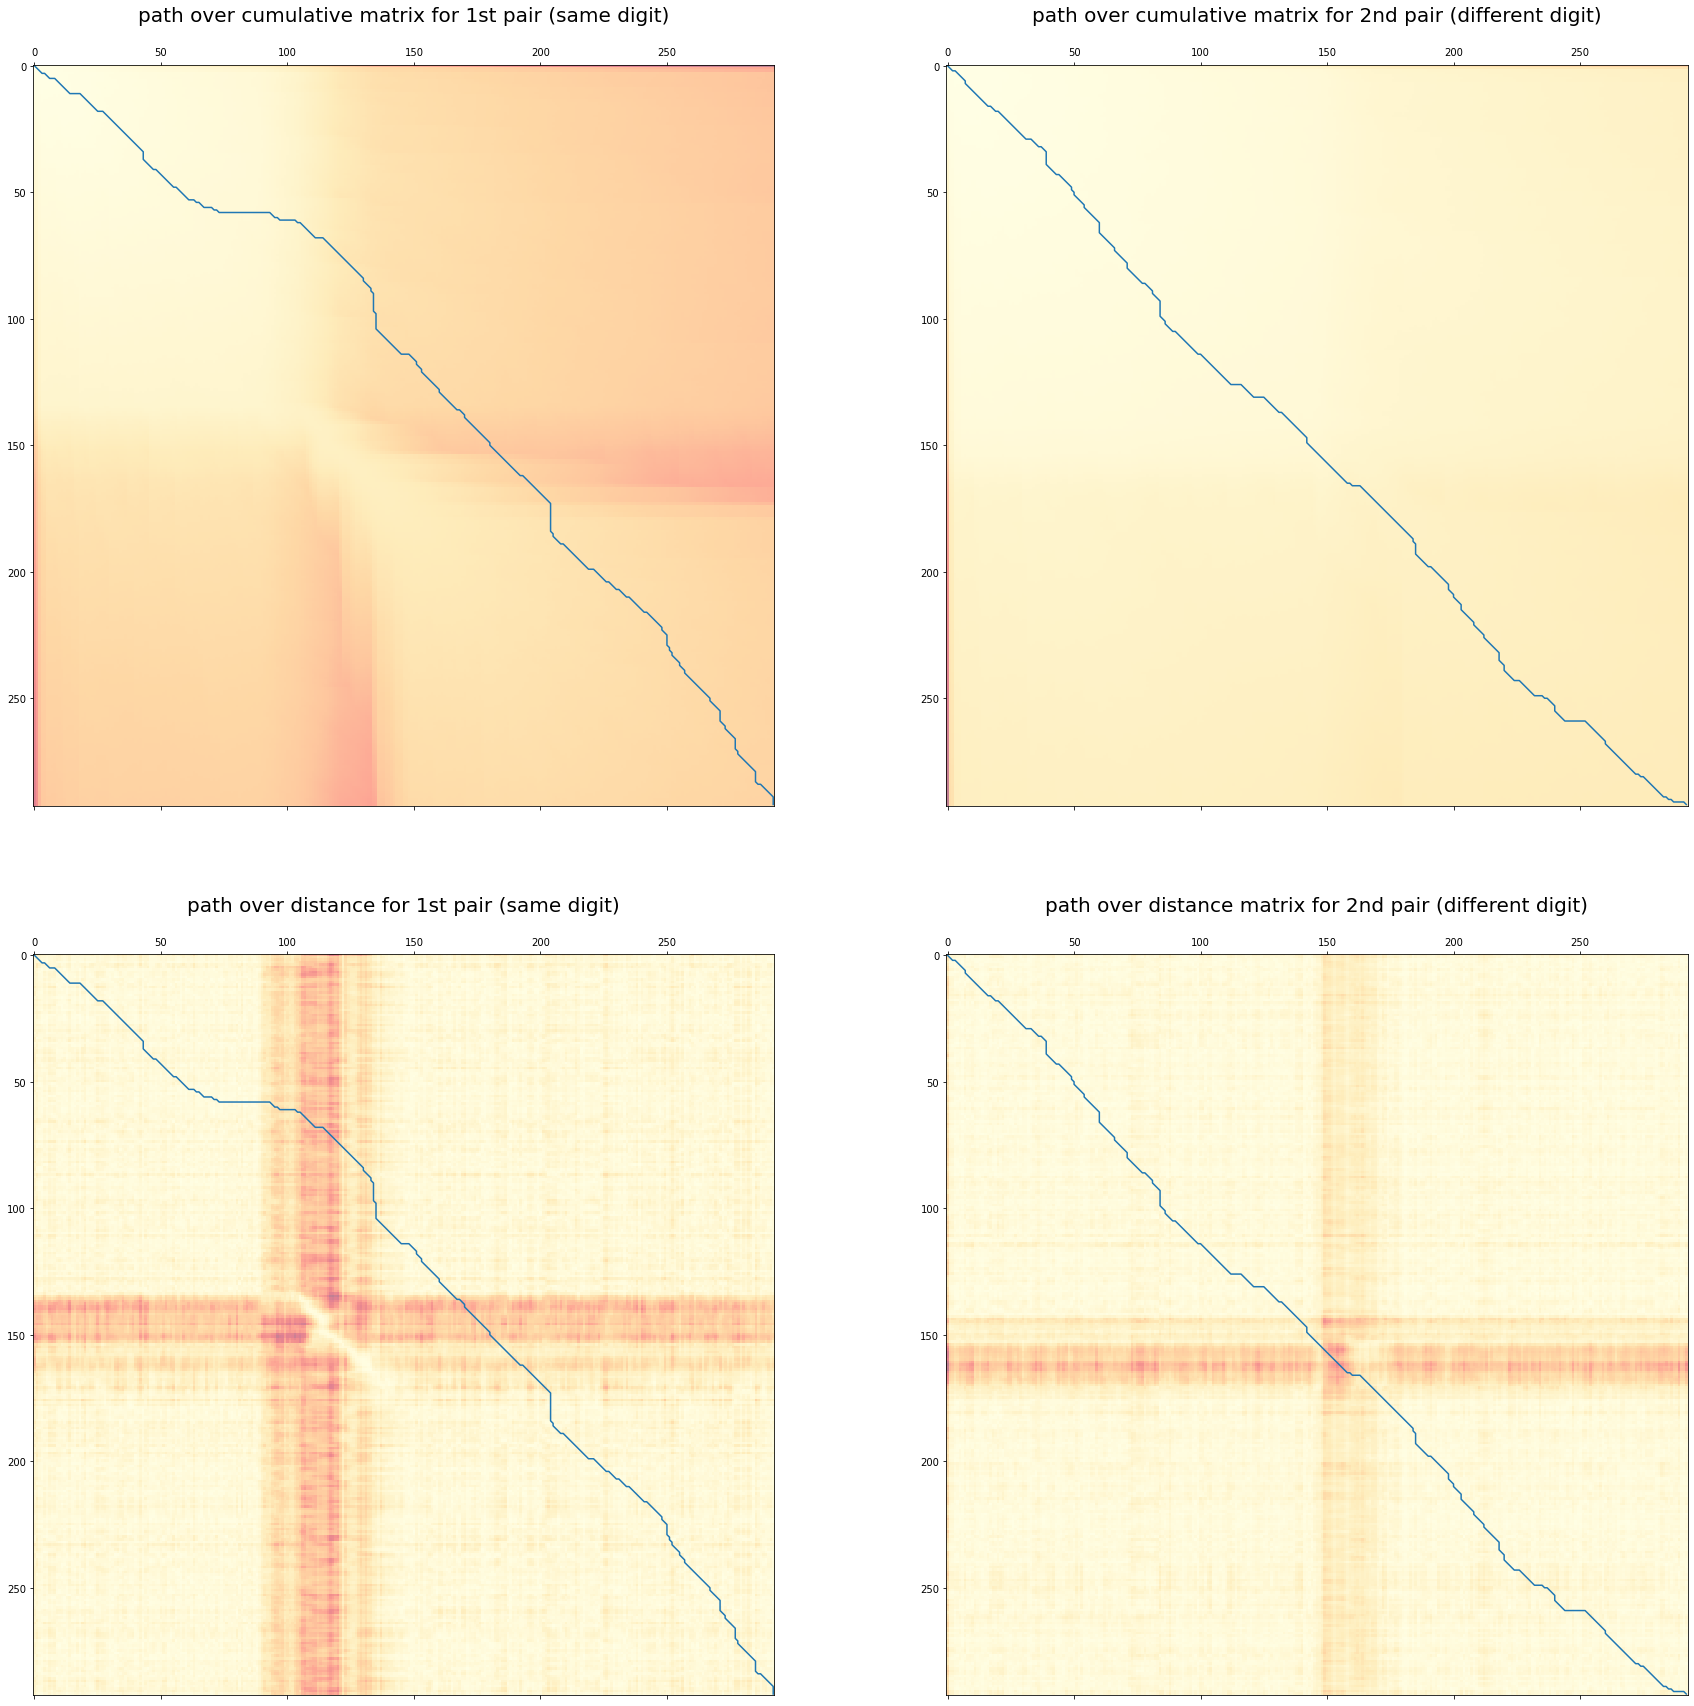

In [ ]:
sig0_1 = templates[1] # digit 0
sig0_2 = templates[2] # digit 0 another sample

sig3_1 = templates[13] # digit 3
sig9_2 = templates[37] # digit 9

opt_dist1, opt_path1 = DTW(sig0_1,sig0_2)
opt_dist2, opt_path2 = DTW(sig3_1,sig9_2)

path1 = (np.array(opt_path1).reshape((len(opt_path1),2)))
path2 = (np.array(opt_path2).reshape((len(opt_path2),2)))




mat_c1,mat_d1 = DTW_MAT(sig0_1,sig0_2)
mat_c2,mat_d2 = DTW_MAT(sig3_1,sig9_2)


fig, (px1,px2) = plt.subplots(2,2, figsize=(30, 30))
px1[0].set_title("path over cumulative matrix for 1st pair (same digit)",fontsize=20)
px1[0].plot(path1[:,0],path1[:,1])
px1[0].matshow(mat_c1, cmap=plt.cm.YlOrRd, alpha=0.5)
px1[1].set_title("path over cumulative matrix for 2nd pair (different digit)",fontsize=20)
px1[1].plot(path2[:,0],path2[:,1])
px1[1].matshow(mat_c2, cmap=plt.cm.YlOrRd, alpha=0.5)

px2[0].set_title("path over distance for 1st pair (same digit)",fontsize=20)
px2[0].plot(path1[:,0],path1[:,1]) 
px2[0].matshow(mat_d1, cmap=plt.cm.YlOrRd, alpha=0.5)
px2[1].set_title("path over distance matrix for 2nd pair (different digit)",fontsize=20)
px2[1].plot(path2[:,0],path2[:,1])
px2[1].matshow(mat_d2, cmap=plt.cm.YlOrRd, alpha=0.5)

print(f"Optimal Distance for 1st pair of digits (same) : {opt_dist1}")
print(f"Optimal Distance for 2nd pair of digits (different) : {opt_dist2}")

In [ ]:
arr, pred = digit_Classify(templates,sig0_1)
arr1, pred1 = digit_Classify(templates,sig0_2)
arr2, pred2 = digit_Classify(templates,sig3_1)
arr3, pred3 = digit_Classify(templates,sig9_2)
print(pred)
print(pred1)
print(pred2)
print(pred3)

opttimal distance : 456671.2257072428
opttimal distance : 601213.2521480087
opttimal distance : 583460.7035690227
opttimal distance : 608866.5117439337
opttimal distance : 625974.5761396921
opttimal distance : 680095.7061422921
opttimal distance : 658789.5668754688
opttimal distance : 684723.7613383532
opttimal distance : 627799.8227783307
opttimal distance : 632530.3067039725
opttimal distance : 498304.621118033
opttimal distance : 702418.736732159
opttimal distance : 649904.1805647095
opttimal distance : 622062.1836194596
opttimal distance : 646843.8125873986
opttimal distance : 758233.0174886471
opttimal distance : 670144.7801593993
opttimal distance : 702132.5660002733
opttimal distance : 703466.7053934997
opttimal distance : 737874.667204182
opttimal distance : 647430.1527480488
opttimal distance : 662503.1156794482
opttimal distance : 606988.0701845677
opttimal distance : 509428.5407293504
opttimal distance : 718007.0463950048
opttimal distance : 639519.902806196
opttimal distanc

**Compute the required metrics ( digit recognition accuracy ) and illustrations ( confusion matrix )**

In [ ]:
confusion_matrix = np.zeros((10,10))

num_attempts = 0
correct_classification = 0
for i,temp in enumerate(templates):
  if(i%4==0): continue  ## only going over test data samples
  arr, pred = digit_Classify(templates,temp)
  num_attempts += 1
  confusion_matrix[pred,i//4] += 1
  print(f"predicted digit : {pred} , original digit : {i//4}")
  if(pred == i//4):
    correct_classification += 1

print(num_attempts)
print(correct_classification)

accuracy = correct_classification/num_attempts
print(f"Accuracy : {accuracy*100} %")

print(f"Confusion Matrix : \n{confusion_matrix}")

predicted digit : 0 , original digit : 0
predicted digit : 0 , original digit : 0
predicted digit : 0 , original digit : 0
predicted digit : 1 , original digit : 1
predicted digit : 1 , original digit : 1
predicted digit : 1 , original digit : 1
predicted digit : 2 , original digit : 2
predicted digit : 2 , original digit : 2
predicted digit : 2 , original digit : 2
predicted digit : 3 , original digit : 3
predicted digit : 3 , original digit : 3
predicted digit : 3 , original digit : 3
predicted digit : 4 , original digit : 4
predicted digit : 4 , original digit : 4
predicted digit : 4 , original digit : 4
predicted digit : 5 , original digit : 5
predicted digit : 5 , original digit : 5
predicted digit : 9 , original digit : 5
predicted digit : 6 , original digit : 6
predicted digit : 6 , original digit : 6
predicted digit : 6 , original digit : 6
predicted digit : 7 , original digit : 7
predicted digit : 7 , original digit : 7
predicted digit : 7 , original digit : 7
predicted digit 

Text(0.5, 1.05, 'CUMULATIVE MATRIX')

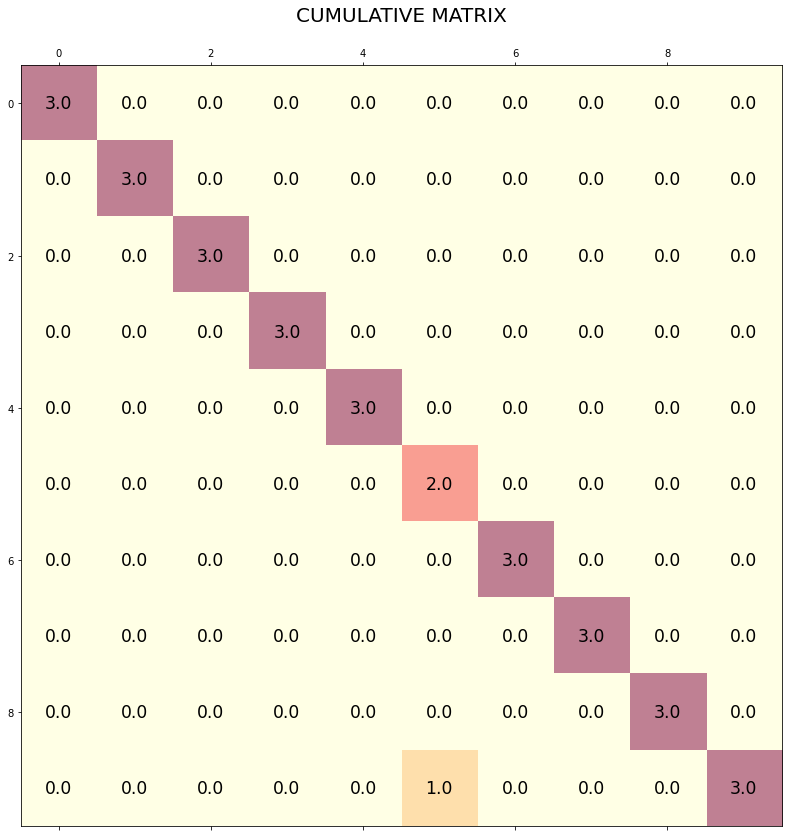

In [ ]:
fig, px = plt.subplots(figsize=(20, 14))
px.matshow(confusion_matrix, cmap=plt.cm.YlOrRd, alpha=0.5)
for i1 in range(confusion_matrix.shape[0]):
  for j1 in range(confusion_matrix.shape[1]):
    px.text(x=j1,y=i1,s=confusion_matrix[i1, j1], va='center', ha='center', size='xx-large')
px.set_title("CUMULATIVE MATRIX", fontsize = 20)

## We can see that mostly th predictions are correct, digit 5 is wrongly classified as 9 once


**Part3**

In this part of the assignment, we expect you to evaluate the above-written digit recognition system performance on different test cases and understand the pros and cons of the DTW algorithm.  
1. Evaluate the performance of digit recognition systems on the TDGIT database shared with you and report the accuracy.
2. Evaluate the performance in different cases, i.e., a pair of templates with the same speaker and a different speaker. 
3. Please report some of the changes to improve the system performance.

**PART 1**

In [ ]:
!pip install dtaidistance
from dtaidistance import dtw

     |████████████████████████████████| 797 kB 8.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for dtaidistance: filename=dtaidistance-2.3.6-cp37-cp37m-linux_x86_64.whl size=1593608 sha256=83dfb03b0982e7948c0e51612f935957c3c2b4ed4f798c6bc45dee4bab9e6641
  Stored in directory: /root/.cache/pip/wheels/a4/04/e5/ff7fd821276e7ec68893652d36b6a13f230ecdcafdc3283b3f
Successfully built dtaidistance


In [ ]:
## Example code to load wavefiles from drive
from google.colab import drive
import os
import soundfile as sf

drive.mount('/content/drive')
bacground_data_location='/content/drive/My Drive/PRMLAssignments/ProgrammingAssignment-05/MultiSpeakerDigitData/' #Change this location
bacground_data_files=[]
for root, dirs, files in os.walk(bacground_data_location):
    for file in files:
        if file.endswith(".wav"):
             bacground_data_files.append(os.path.join(root, file))
bacground_data_files = np.array(bacground_data_files)
bacground_data_files.sort()
bacground_data_files = np.insert(bacground_data_files,0,0)

## Iterate through the files and load them using "sig,sr = sf.read(filename)""
bacground_data_files = bacground_data_files.reshape(10,4,50)

ref_temp1 = bacground_data_files[:,0,1]
ref_temp2 = bacground_data_files[:,1,1]
ref_temp3 = bacground_data_files[:,2,1]
ref_temp4 = bacground_data_files[:,3,1]

ref_temp = [ref_temp1,ref_temp2,ref_temp3,ref_temp4]

print(ref_temp1.shape)
print(ref_temp2.shape)
print(ref_temp3.shape)
print(ref_temp4.shape)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(10,)
(10,)
(10,)
(10,)


In [ ]:
## Speakers : {jackson, nicolas, theo, yweweler}

def digit_Classify1(templates,rec):
  vec = np.zeros(10)
  for i in range(10):
    ## Here we are not using the test data for comparing (only first recorded data)
    sig, tmp = sf.read(templates[i])
    vec[i] = dtw.distance_fast(sig,rec)
  return vec, np.argmin(vec)

confusion_matrix1 = np.zeros((10,10))


correct_classification = 0
total_iter = 0
test_data = []
for id in range(4):
  for i in range(10):
    test_data = bacground_data_files[i,id,[2,3,4,5,6,7,8,9,10]]
    for data in test_data:
      sig, sr = sf.read(data)
      vec, pred = digit_Classify1(ref_temp[id],sig)  
      confusion_matrix1[pred,i] += 1
      print(f"predicted digit : {pred} , original digit : {i}")
      if(pred == i):
        correct_classification += 1
      total_iter += 1

print(total_iter)
print(correct_classification)

accuracy = correct_classification/total_iter
print(f"Accuracy : {accuracy*100} %")
print(f"Confusion Matrix : \n{confusion_matrix1}")

360
162
Accuracy : 45.0 %
Confusion Matrix : 
[[19.  2.  3. 11.  1.  0.  0.  0.  4.  4.]
 [ 0. 19.  0.  0.  3.  8.  1.  2.  2. 12.]
 [ 0.  2. 25.  2.  0.  1.  4.  2.  2.  2.]
 [ 2.  0.  3.  9.  1.  1.  5.  5.  1.  0.]
 [ 6.  8.  0.  3.  9.  3.  0.  3.  4.  2.]
 [ 1.  0.  0.  1. 10. 16.  0.  1.  4.  1.]
 [ 0.  2.  1.  6.  2.  0. 15.  0.  0.  0.]
 [ 1.  1.  1.  3.  7.  5.  9. 20.  2.  2.]
 [ 1.  0.  1.  1.  2.  0.  2.  1. 17.  0.]
 [ 6.  2.  2.  0.  1.  2.  0.  2.  0. 13.]]


Text(0.5, 1.05, 'CUMULATIVE MATRIX')

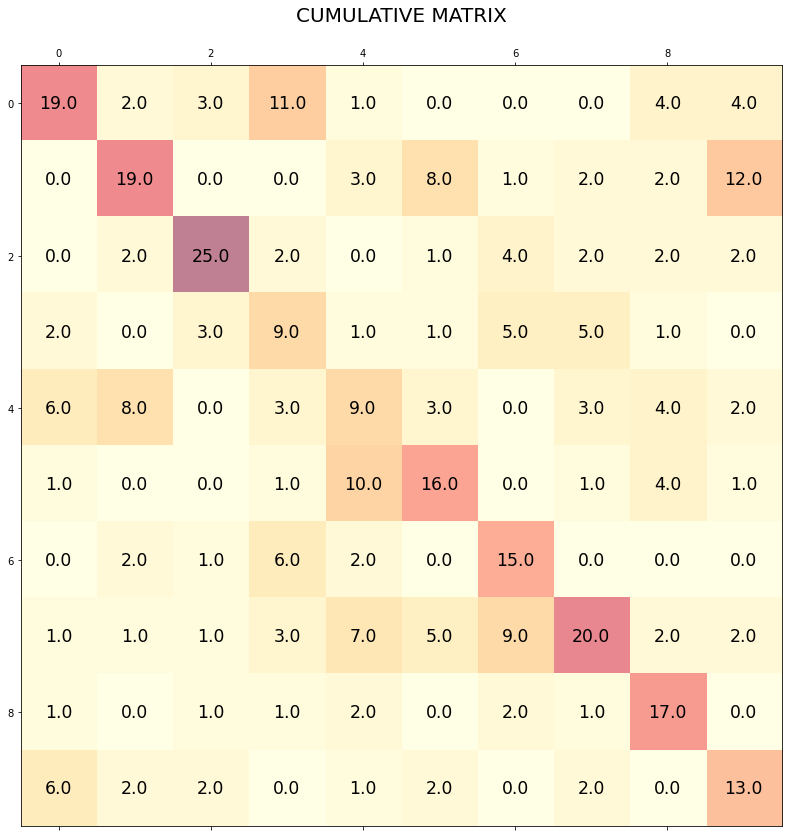

In [ ]:
fig, px = plt.subplots(figsize=(20, 14))
px.matshow(confusion_matrix1, cmap=plt.cm.YlOrRd, alpha=0.5)
for i1 in range(confusion_matrix1.shape[0]):
  for j1 in range(confusion_matrix1.shape[1]):
    px.text(x=j1,y=i1,s=confusion_matrix1[i1, j1], va='center', ha='center', size='xx-large')
px.xaxis("")
px.set_title("CUMULATIVE MATRIX", fontsize = 20)

**PART 2**

Optimal Distance for 1st pair of digits (same speaker, same digit) : 0.008472041226923466
Optimal Distance for 2nd pair of digits (different speaker, same digit) : 44.671471919864416
Optimal Distance for 3rd pair of digits (same speaker, different digit) : 0.24511905200779438
Optimal Distance for 4th pair of digits (different speaker different digit) : 16.29718091059476


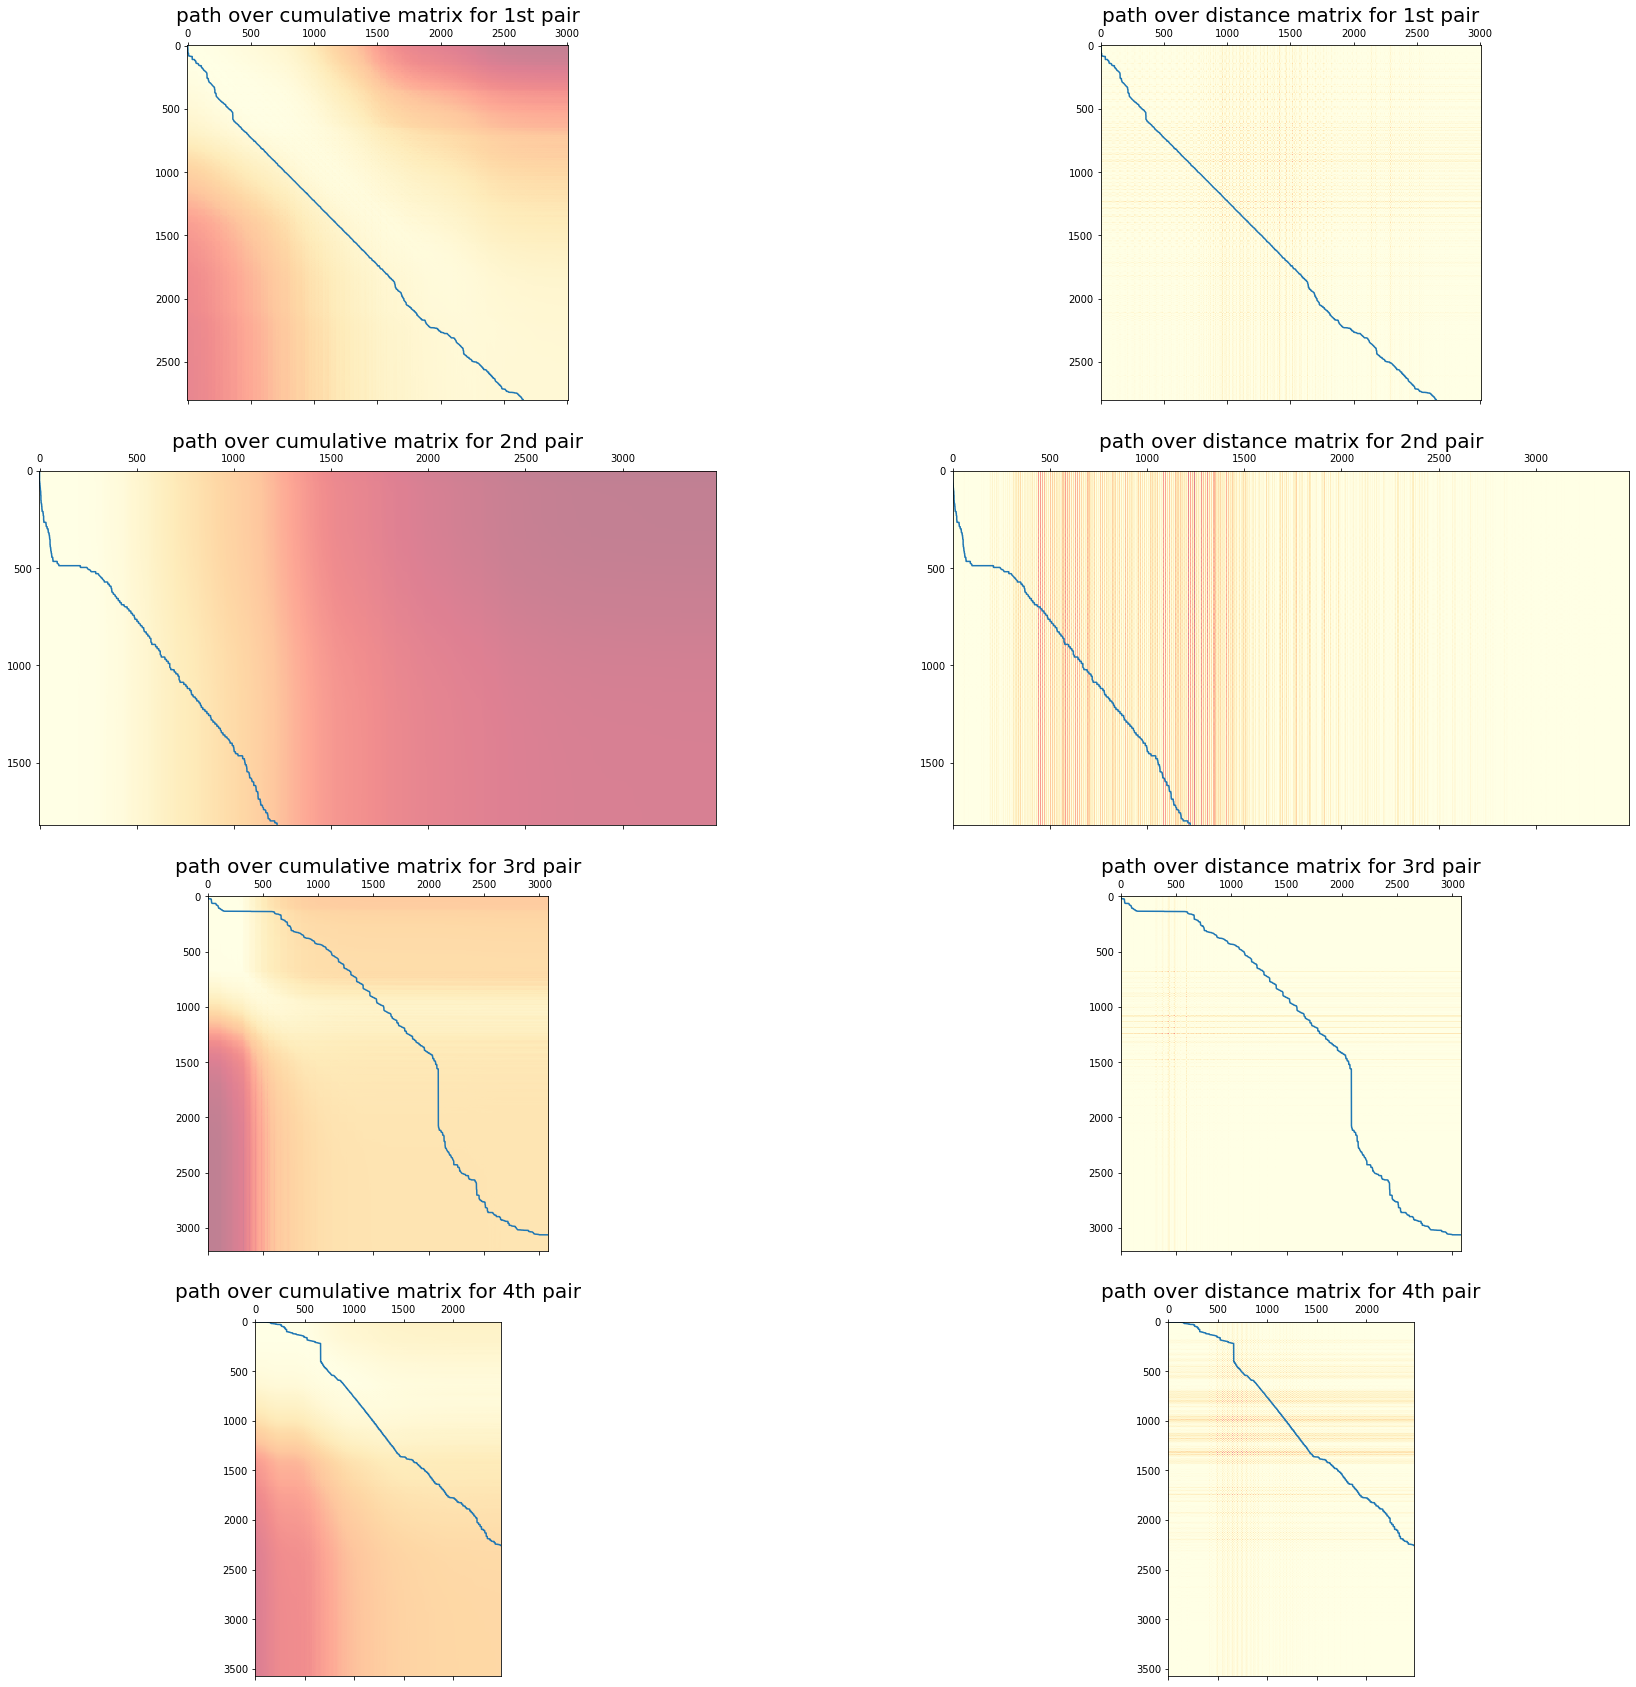

In [ ]:
# same speaker, same digit
sig1, st = sf.read(bacground_data_files[0,2,6])
sig2, st = sf.read(bacground_data_files[0,2,9])

# different speaker, same digit
sig3, st = sf.read(bacground_data_files[3,2,3])
sig4, st = sf.read(bacground_data_files[3,0,5])

# same speaker, different digit
sig5, st = sf.read(bacground_data_files[3,3,3])
sig6, st = sf.read(bacground_data_files[5,3,5])

# differnet speaker, different digit
sig7, st = sf.read(bacground_data_files[3,0,3])
sig8, st = sf.read(bacground_data_files[2,1,5])


dist1, path1 = DTW(sig1,sig2)
dist2, path2 = DTW(sig3,sig4)
dist3, path3 = DTW(sig5,sig6)
dist4, path4 = DTW(sig7,sig8)

print(f"Optimal Distance for 1st pair of digits (same speaker, same digit) : {dist1}")
print(f"Optimal Distance for 2nd pair of digits (different speaker, same digit) : {dist2}")
print(f"Optimal Distance for 3rd pair of digits (same speaker, different digit) : {dist3}")
print(f"Optimal Distance for 4th pair of digits (different speaker different digit) : {dist4}")



path1 = (np.array(path1).reshape((len(path1),2)))
path2 = (np.array(path2).reshape((len(path2),2)))
path3 = (np.array(path3).reshape((len(path3),2)))
path4 = (np.array(path4).reshape((len(path4),2)))




mat_c1,mat_d1 = DTW_MAT(sig1,sig2)
mat_c2,mat_d2 = DTW_MAT(sig3,sig4)
mat_c3,mat_d3 = DTW_MAT(sig5,sig6)
mat_c4,mat_d4 = DTW_MAT(sig7,sig8)



fig, (px1) = plt.subplots(4,2, figsize=(30, 30))

px1[0][0].set_title("path over cumulative matrix for 1st pair",fontsize=20)
px1[0][0].plot(path1[:,0],path1[:,1])
px1[0][0].matshow(mat_c1, cmap=plt.cm.YlOrRd, alpha=0.5)
px1[1][0].set_title("path over cumulative matrix for 2nd pair",fontsize=20)
px1[1][0].plot(path2[:,0],path2[:,1])
px1[1][0].matshow(mat_c2, cmap=plt.cm.YlOrRd, alpha=0.5)
px1[2][0].set_title("path over cumulative matrix for 3rd pair",fontsize=20)
px1[2][0].plot(path3[:,0],path3[:,1])
px1[2][0].matshow(mat_c3, cmap=plt.cm.YlOrRd, alpha=0.5)
px1[3][0].set_title("path over cumulative matrix for 4th pair",fontsize=20)
px1[3][0].plot(path4[:,0],path4[:,1])
px1[3][0].matshow(mat_c4, cmap=plt.cm.YlOrRd, alpha=0.5)


px1[0][1].set_title("path over distance matrix for 1st pair",fontsize=20)
px1[0][1].plot(path1[:,0],path1[:,1])
px1[0][1].matshow(mat_d1, cmap=plt.cm.YlOrRd, alpha=0.5)
px1[1][1].set_title("path over distance matrix for 2nd pair",fontsize=20)
px1[1][1].plot(path2[:,0],path2[:,1])
px1[1][1].matshow(mat_d2, cmap=plt.cm.YlOrRd, alpha=0.5)
px1[2][1].set_title("path over distance matrix for 3rd pair",fontsize=20)
px1[2][1].plot(path3[:,0],path3[:,1])
px1[2][1].matshow(mat_d3, cmap=plt.cm.YlOrRd, alpha=0.5)
px1[3][1].set_title("path over distance matrix for 4th pair",fontsize=20)
px1[3][1].plot(path4[:,0],path4[:,1])
px1[3][1].matshow(mat_d4, cmap=plt.cm.YlOrRd, alpha=0.5)



**PART3**
***
As we can observe in above part, the optimal distance for different speaker is very large if compared to same speaker data distance (even is different speakers speak same digit, the distance is even larger than same speaker speaking different digits; dist2 >> dist3)
We can other methods to look for those statistical variations that occur due to change in speaker. We can use HMM model